In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, irfft, fftfreq

In [3]:
df = pd.read_csv("../DATA/subject_18/smell 1.csv")
df

,Unnamed: 0,time,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8
0,0,0.003971,142261.437500,139882.593750,160506.453125,144609.453125,155328.890625,158722.156250,158679.062500,140591.406250
1,1,0.007972,142258.671875,139879.812500,160522.546875,144601.843750,155326.656250,158723.859375,158676.921875,140588.359375
2,2,0.011972,142247.484375,139866.312500,160531.218750,144599.078125,155316.375000,158707.046875,158665.656250,140586.125000
3,3,0.015971,142239.718750,139856.031250,160508.156250,144585.390625,155302.437500,158691.500000,158648.390625,140573.171875
4,4,0.019971,142249.812500,139863.453125,160497.781250,144587.093750,155306.000000,158697.578125,158650.812500,140572.453125
...,...,...,...,...,...,...,...,...,...,...
2496,2496,9.987983,142177.390625,140116.203125,160595.593750,143800.406250,155148.031250,158589.750000,158549.328125,140604.906250
2497,2497,9.991983,142191.343750,140130.515625,160596.312500,143817.484375,155162.156250,158601.453125,158562.296875,140617.875000
2498,2498,9.995982,142193.671875,140138.031250,160608.281250,143824.984375,155170.203125,158614.515625,158575.437500,140627.890625
2499,2499,9.999982,142179.359375,140128.093750,160624.375000,143821.062500,155158.843750,158604.593750,158566.953125,140620.375000


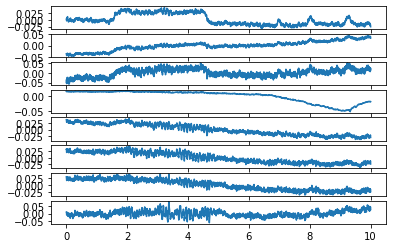

In [13]:
Signal = []
for i in range(8):
    s = np.array(df['Electrode ' + str(i+1)])
    s = s-np.mean(s) # On centre le signal
    s = s/np.linalg.norm(s) # On normalise le signal 
    Signal.append(s)
    plt.subplot(8,1,i+1)
    plt.plot(df['time'],s)
plt.show()

[3.97145041e-03 7.97175036e-03 1.19719503e-02 ... 9.99598214e+00
 9.99998234e+00 1.00039825e+01]


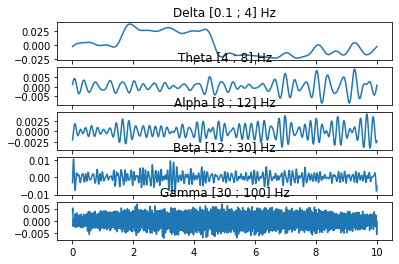

In [31]:
from scipy.fftpack import rfft, irfft, fftfreq

time   = np.array(df['time'])
print(time)
signal = Signal[0]

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

# If our original signal time was in seconds, this is now in Hz    
delta_f = f_signal.copy()
delta_f[(W<0.1)] = 0
delta_f[(W>4)] = 0
delta_s = irfft(delta_f)

theta_f = f_signal.copy()
theta_f[(W<4)] = 0
theta_f[(W>8)] = 0
theta_s = irfft(theta_f)

alpha_f = f_signal.copy()
alpha_f[(W<8)] = 0
alpha_f[(W>12)] = 0
alpha_s = irfft(alpha_f)

beta_f = f_signal.copy()
beta_f[(W<12)] = 0
beta_f[(W>30)] = 0
beta_s = irfft(beta_f)

gamma_f = f_signal.copy()
gamma_f[(W<30)] = 0
gamma_f[(W>100)] = 0
gamma_s = irfft(gamma_f)



plt.subplot(511)
plt.plot(time,delta_s)
plt.title('Delta [0.1 ; 4] Hz')
plt.subplot(512)
plt.plot(time,theta_s)
plt.title('Theta [4 ; 8] Hz')
plt.subplot(513)
plt.plot(time,alpha_s)
plt.title('Alpha [8 ; 12] Hz')
plt.subplot(514)
plt.plot(time,beta_s)
plt.title('Beta [12 ; 30] Hz')
plt.subplot(515)
plt.plot(time,gamma_s)
plt.title('Gamma [30 ; 100] Hz')
plt.show()